Import Python Libraries

In [2]:
#pandas and Numpy have been used for Data Manipulation and numerical Calculations
import numpy as np
import pandas as pd 
#Matplotlib and Seaborn have been used for Data visualizations. 
import matplotlib.pyplot as plt
import seaborn as sns

Reading Dataset

In [3]:
df=pd.read_csv("C:\\Users\\bharg\\OneDrive\\Desktop\\eda\\heart.csv")

.age - Age of the person.
.gender - Gender of the person.
    0:Male
    1:Female
.ChestPain - Chest Pain type.
    Value 1:typical angina
    Value 2: atypical angina
    Value 3: non-anginal pain
    Value 4: asymptomatic
.trtbps - resting blood pressure (in mm Hg).
.chol - cholestoral in mg/dl fetched via BMI sensor.
.bloodsugar - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false).
.restecg - resting electrocardiographic results.
    Value 0: normal
    Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
.max_hr - maximum heart rate achieved.
.exng - exercise induced angina (1 = yes; 0 = no).
.oldpeak - Previous peak.
.slp - Slope.
    0:upsloping
    1:flat
    2:downsloping
.num_vessels- number of major vessels (0-3).
.thall - Thal rate.
    0:normal 0
    1:normal 1
    2:fixed defect
    3:reversable defect
.output- Target variable.
    0= less chance of heart attack
    1= more chance of heart attack

Analyzing the Data

In [39]:
df.head()#prints top 5 rows

,age,gender,ChestPain,trtbps,chol,bloodsugar,restecg,max_hr,exng,oldpeak,slp,num_vessels,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
df.columns

Index(['age', 'gender', 'ChestPain', 'trtbps', 'chol', 'bloodsugar', 'restecg',
       'max_hr', 'exng', 'oldpeak', 'slp', 'num_vessels', 'thall', 'output'],
      dtype='object')

In [5]:
df.describe()#statistical summary of the numerical data and basic distribution

,age,gender,ChestPain,trtbps,chol,bloodsugar,restecg,max_hr,exng,oldpeak,slp,num_vessels,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [14]:
df.shape

(303, 14)

In [6]:
df.info()#data types of each column, the number of non-null values, and memory usage.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          303 non-null    int64  
 1   gender       303 non-null    int64  
 2   ChestPain    303 non-null    int64  
 3   trtbps       303 non-null    int64  
 4   chol         303 non-null    int64  
 5   bloodsugar   303 non-null    int64  
 6   restecg      303 non-null    int64  
 7   max_hr       303 non-null    int64  
 8   exng         303 non-null    int64  
 9   oldpeak      303 non-null    float64
 10  slp          303 non-null    int64  
 11  num_vessels  303 non-null    int64  
 12  thall        303 non-null    int64  
 13  output       303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
# Check for duplicates
duplicates = df.duplicated()
# Count the number of duplicates
num_duplicates = duplicates.sum()
print("Number of duplicate rows:", num_duplicates)

Number of duplicate rows: 1


In [4]:
# Drop duplicate rows
df=df.drop_duplicates()

# Check the shape of the DataFrame after dropping duplicates
print("Shape of DataFrame after dropping duplicates:", df.shape)

Shape of DataFrame after dropping duplicates: (302, 14)


In [5]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values)

Missing values per column:
age            0
gender         0
ChestPain      0
trtbps         0
chol           0
bloodsugar     0
restecg        0
max_hr         0
exng           0
oldpeak        0
slp            0
num_vessels    0
thall          0
output         0
dtype: int64


no missing values from dataset

In [20]:
# the column you want to convert is named 'float_column'
print(df.dtypes)
# Convert the float column to int
df['oldpeak'] = df['oldpeak'].astype(int)
# Display the data types after conversion
print(df.dtypes)

age              int64
gender           int64
ChestPain        int64
trtbps           int64
chol             int64
bloodsugar       int64
restecg          int64
max_hr           int64
exng             int64
oldpeak        float64
slp              int64
num_vessels      int64
thall            int64
output           int64
dtype: object
age            int64
gender         int64
ChestPain      int64
trtbps         int64
chol           int64
bloodsugar     int64
restecg        int64
max_hr         int64
exng           int64
oldpeak        int32
slp            int64
num_vessels    int64
thall          int64
output         int64
dtype: object


In [3]:
numerical_features = ["age", "trtbps", "chol", "oldpeak"]
categorical_features = ["gender", "ChestPain", "bloodsugar", "restecg", "exng", "slp", "num_vessels", "thall", "output"]

numerical_data = df[numerical_features]
categorical_data = df[categorical_features]

In [7]:
df[numerical_features].describe()

,age,trtbps,chol,oldpeak
count,302.00000,302.000000,302.000000,302.000000
mean,54.42053,131.602649,246.500000,1.043046
std,9.04797,17.563394,51.753489,1.161452
min,29.00000,94.000000,126.000000,0.000000
25%,48.00000,120.000000,211.000000,0.000000
50%,55.50000,130.000000,240.500000,0.800000
75%,61.00000,140.000000,274.750000,1.600000
max,77.00000,200.000000,564.000000,6.200000


# Univariant visual analysis using box plot of Numerical Features

In [ ]:
Univariate analysis is technique in EDA that focuses on analyzing individual variables or attributes one at a time

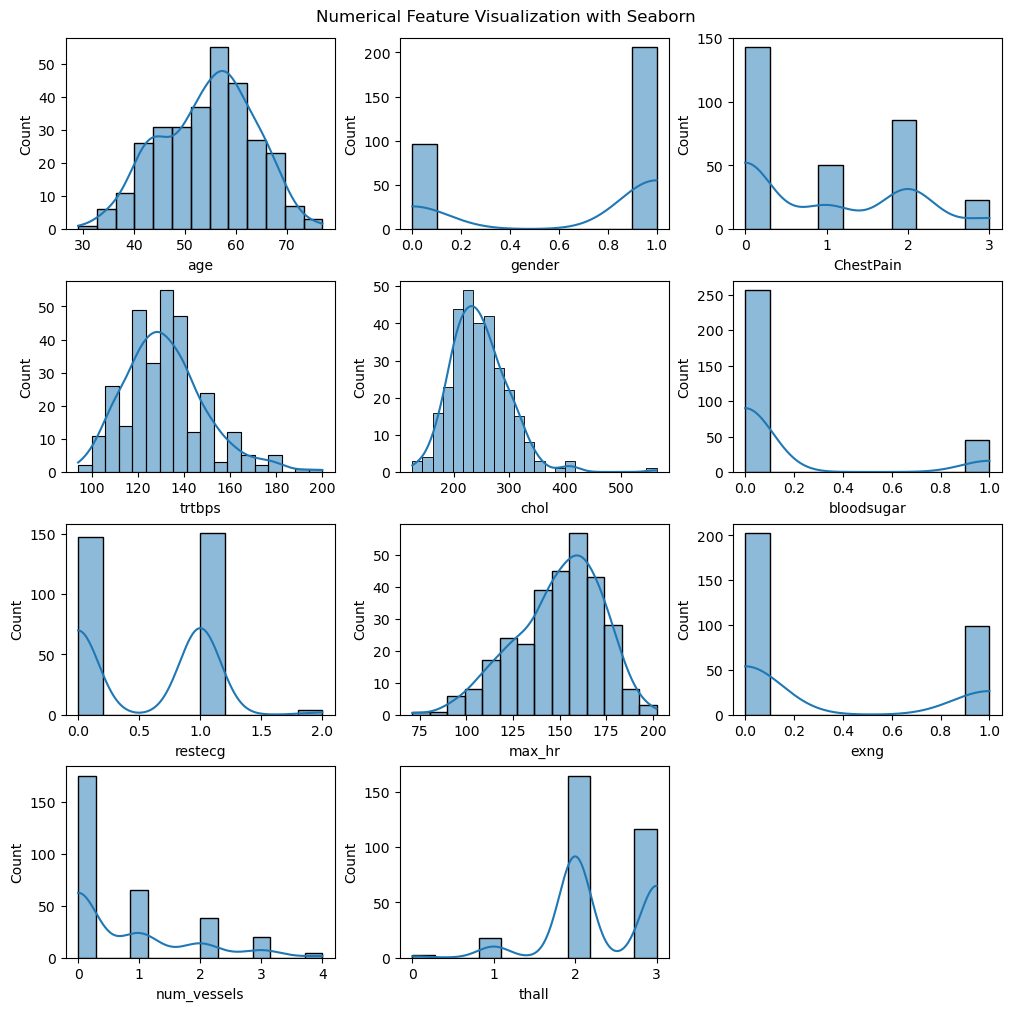

In [8]:
fig, axs = plt.subplots(4, 3, figsize=(10, 10), constrained_layout=True)
fig.suptitle("Numerical Feature Visualization with Seaborn")

# Iterate through each subplot and plot histogram with KDE
sns.histplot(data=df, x='age', ax=axs[0, 0], kde=True)
sns.histplot(data=df, x='gender', ax=axs[0, 1], kde=True)
sns.histplot(data=df, x='ChestPain', ax=axs[0, 2], kde=True)
sns.histplot(data=df, x='trtbps', ax=axs[1, 0], kde=True)
sns.histplot(data=df, x='chol', ax=axs[1, 1], kde=True)
sns.histplot(data=df, x='bloodsugar', ax=axs[1, 2], kde=True)
sns.histplot(data=df, x='restecg', ax=axs[2, 0], kde=True)
sns.histplot(data=df, x='max_hr', ax=axs[2, 1], kde=True)
sns.histplot(data=df, x='exng', ax=axs[2, 2], kde=True)
sns.histplot(data=df, x='num_vessels', ax=axs[3, 0], kde=True)
sns.histplot(data=df, x='thall', ax=axs[3, 1], kde=True)

axs[3, 2].axis('off')

plt.show()

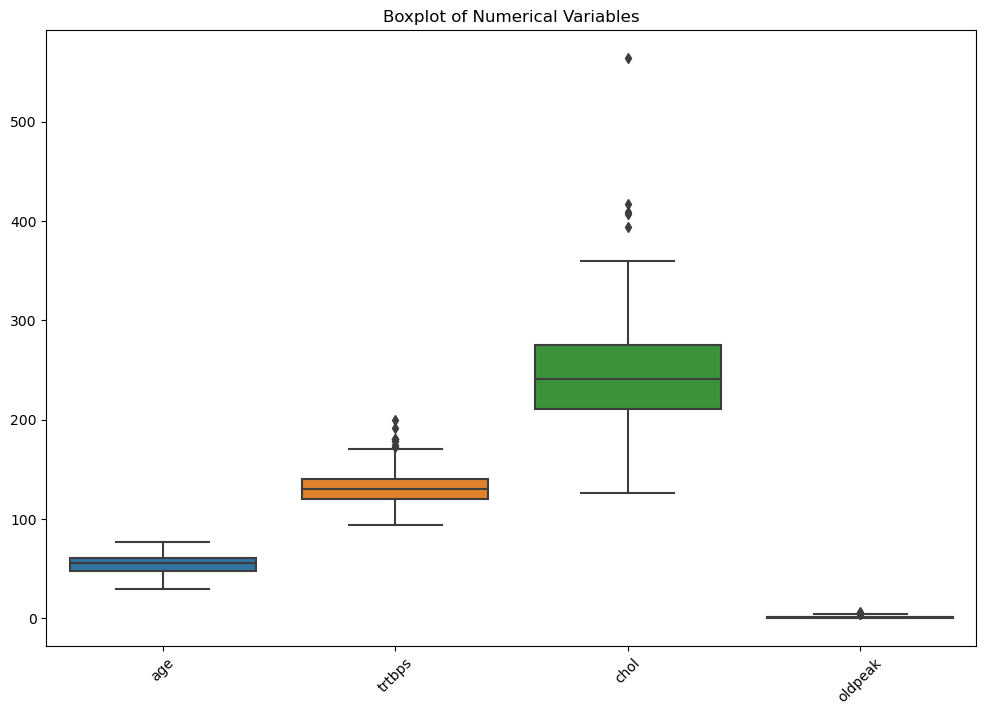

In [9]:
# Boxplot for each numerical variable
plt.figure(figsize=(12, 8))  
sns.boxplot(data=numerical_data)
plt.title('Boxplot of Numerical Variables')
plt.xticks(rotation=45)  
plt.show()

In [10]:
numerical_data= numerical_data.loc[numerical_data["trtbps"]<120]
numerical_data = numerical_data.loc[numerical_data['chol']<350]
numerical_data = numerical_data.loc[numerical_data['age']<70]

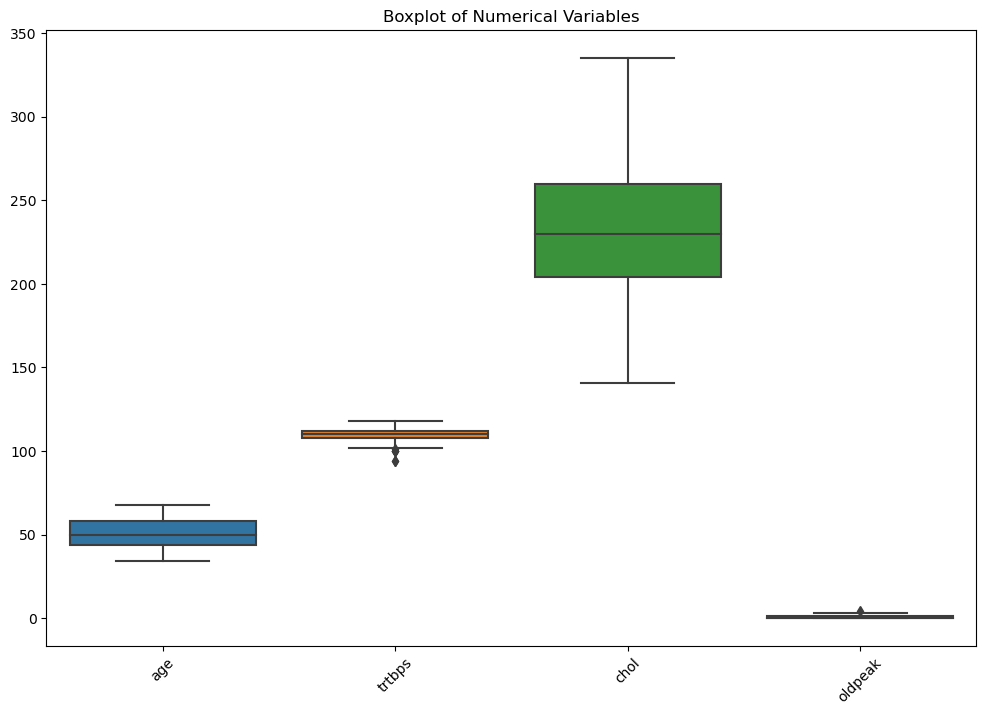

In [11]:
# Boxplot for each numerical variable
plt.figure(figsize=(12, 8))  
sns.boxplot(data=numerical_data)
plt.title('Boxplot of Numerical Variables')
plt.xticks(rotation=45)  
plt.show()

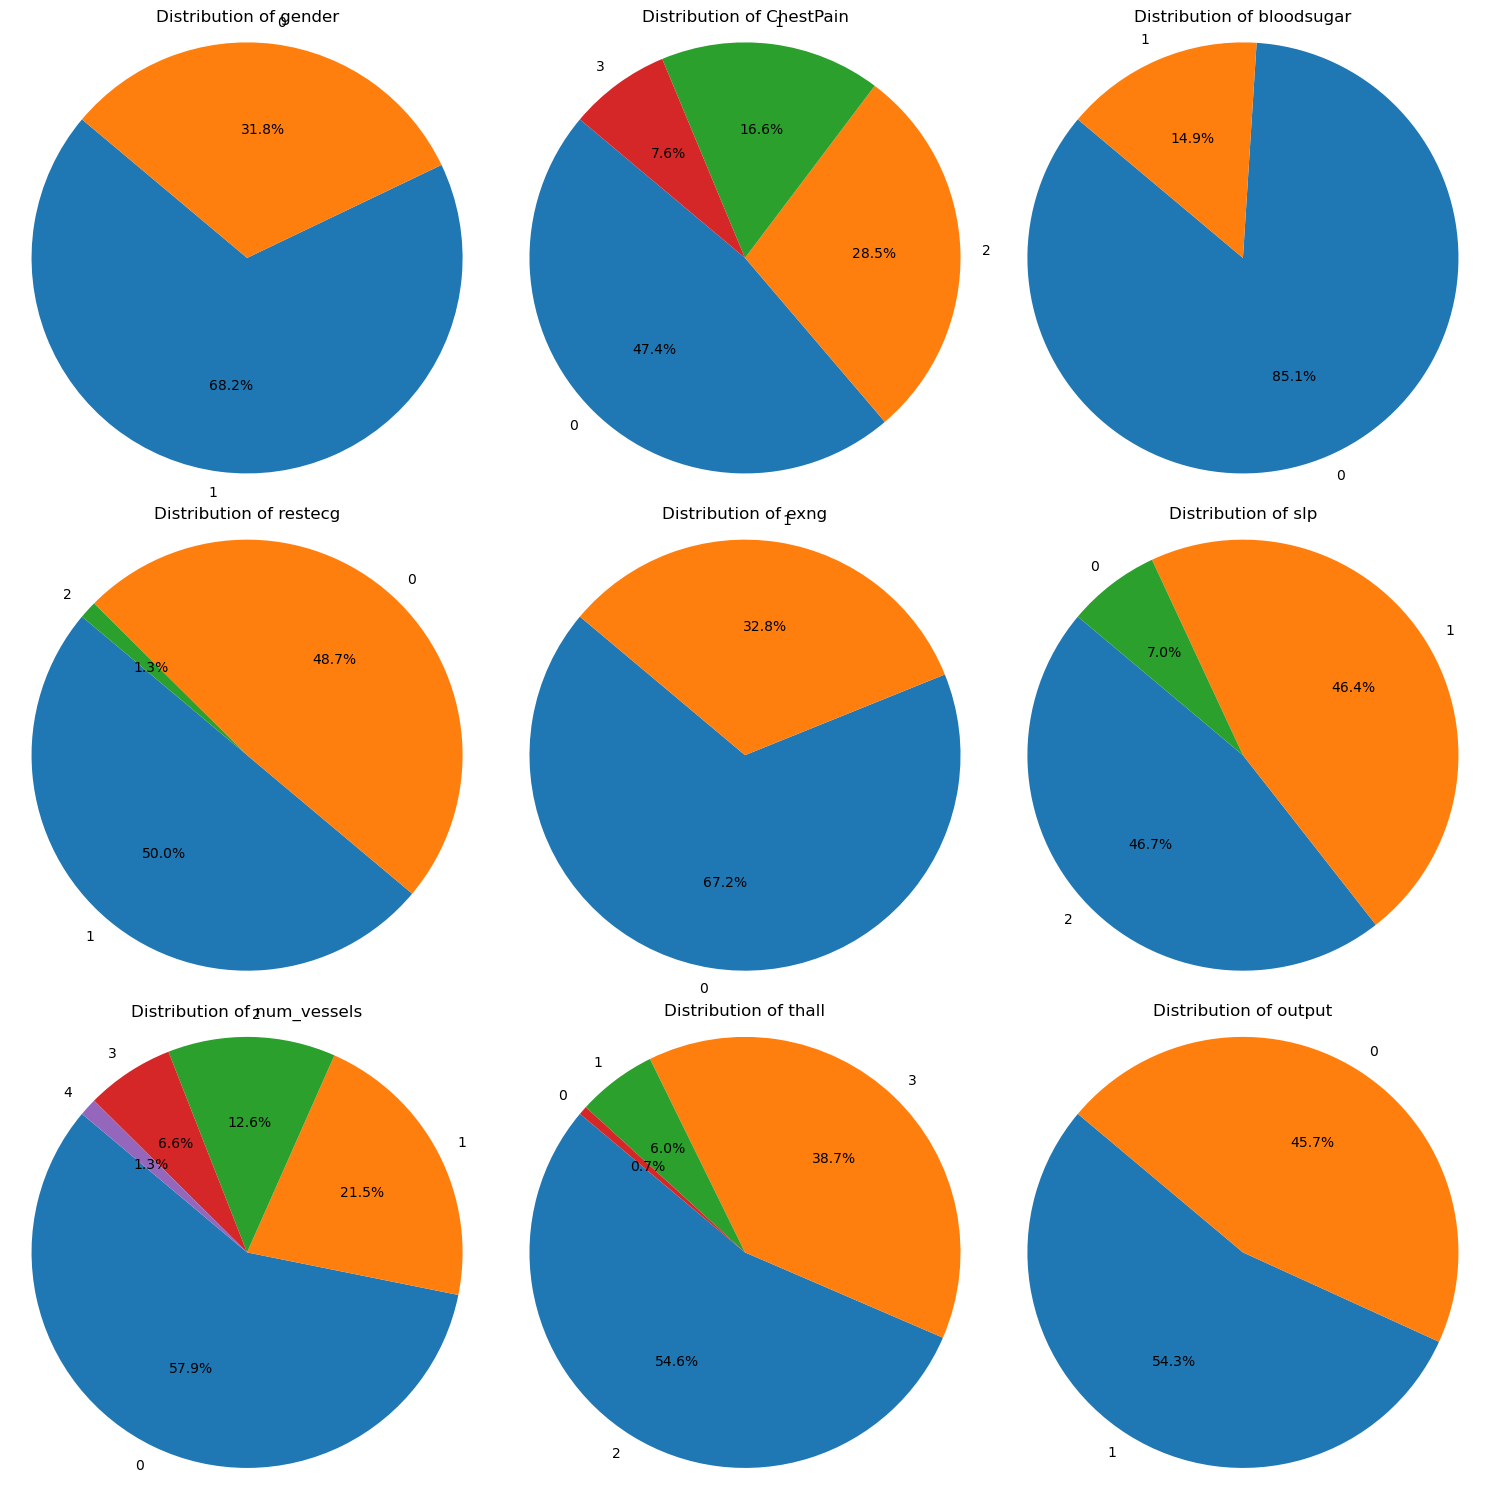

In [12]:
categorical_features = ['gender', 'ChestPain', 'bloodsugar', 'restecg', 'exng', 'slp', 'num_vessels', 'thall', 'output']
num_rows = (len(categorical_features) - 1) // 3 + 1
num_cols = min(len(categorical_features), 3)

# Create subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

# Flatten the axis array to handle both cases when there's only one row or more
axs = axs.flatten()

# Iterate over each categorical column and create a pie chart
for i, col in enumerate(categorical_features):
    categorical_features = df[col].value_counts()
    axs[i].pie(categorical_features, labels=categorical_features.index, autopct='%1.1f%%', startangle=140)
    axs[i].set_title(f'Distribution of {col}')
    axs[i].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Hide any unused subplots
for j in range(len(categorical_features), len(axs)):
    axs[j].axis('off')

plt.tight_layout()
plt.show()

# univariate non-visual analysis for numerical features

In [13]:
numerical_features = df.select_dtypes(include=['int64', 'float64'])

# Summary statistics for numerical features
summary_statistics = numerical_features.describe()
print("Summary statistics for numerical features:")
print(summary_statistics)

# Compute skewness for numerical variables
skewness = numerical_features.skew()
print("\nSkewness:")
print(skewness)

# Compute kurtosis for numerical variables
kurtosis = numerical_features.kurtosis()
print("\nKurtosis:")
print(kurtosis)

# Compute percentiles for numerical variables
percentiles = numerical_features.quantile([0.25, 0.5, 0.75])
print("\nPercentiles:")
print(percentiles)


Summary statistics for numerical features:
             age      gender   ChestPain      trtbps        chol  bloodsugar  \
count  302.00000  302.000000  302.000000  302.000000  302.000000  302.000000   
mean    54.42053    0.682119    0.963576  131.602649  246.500000    0.149007   
std      9.04797    0.466426    1.032044   17.563394   51.753489    0.356686   
min     29.00000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     48.00000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.50000    1.000000    1.000000  130.000000  240.500000    0.000000   
75%     61.00000    1.000000    2.000000  140.000000  274.750000    0.000000   
max     77.00000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg      max_hr        exng     oldpeak         slp  \
count  302.000000  302.000000  302.000000  302.000000  302.000000   
mean     0.526490  149.569536    0.327815    1.043046    1.397351   
std      0.526027   22.903527

In [27]:
# Iterate through each categorical feature
for feature in categorical_features:
    print(f"\nCategorical Column: {feature}")
    print("Unique Values Count:")
    print(categorical_data.value_counts())


Categorical Column: 164
Unique Values Count:
gender  ChestPain  bloodsugar  restecg  exng  slp  num_vessels  thall  output
1       1          0           1        0     2    0            2      1         9
        2          0           1        0     2    0            2      1         7
0       2          0           1        0     1    0            2      1         6
1       0          0           1        1     1    1            3      0         6
0       2          0           1        0     2    0            2      1         5
                                                                                ..
1       0          0           1        0     1    0            1      1         1
                                                                2      0         1
                                                                       1         1
                                                                3      0         1
        3          1           1        0     

In [8]:
# Iterate through each discrete feature
for feature in numerical_features:
    print(f"\nDiscrete Column: {feature}")
    print("Unique Values Count:")
    print(df[numerical_features].value_counts())    


Discrete Column: age
Unique Values Count:
age  trtbps  chol  oldpeak
38   138     175   0.0        2
29   130     204   0.0        1
59   160     273   0.0        1
     150     212   1.6        1
     140     221   0.0        1
                             ..
51   130     305   1.2        1
             256   0.5        1
     125     245   2.4        1
             213   1.4        1
77   125     304   0.0        1
Name: count, Length: 302, dtype: int64

Discrete Column: trtbps
Unique Values Count:
age  trtbps  chol  oldpeak
38   138     175   0.0        2
29   130     204   0.0        1
59   160     273   0.0        1
     150     212   1.6        1
     140     221   0.0        1
                             ..
51   130     305   1.2        1
             256   0.5        1
     125     245   2.4        1
             213   1.4        1
77   125     304   0.0        1
Name: count, Length: 302, dtype: int64

Discrete Column: chol
Unique Values Count:
age  trtbps  chol  oldpeak
38  

Bivariant non visual analysis
num vs num

In [15]:
-df.corr()

,age,gender,ChestPain,trtbps,chol,bloodsugar,restecg,max_hr,exng,oldpeak,slp,num_vessels,thall,output
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
gender,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
ChestPain,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trtbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
bloodsugar,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
max_hr,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exng,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


Num vs Num visual analysis

In [10]:
df.columns

Index(['age', 'gender', 'ChestPain', 'trtbps', 'chol', 'bloodsugar', 'restecg',
       'max_hr', 'exng', 'oldpeak', 'slp', 'num_vessels', 'thall', 'output'],
      dtype='object')

In [7]:
numerical_data.columns

Index(['age', 'trtbps', 'chol', 'oldpeak'], dtype='object')

In [9]:
categorical_data.columns

Index(['gender', 'ChestPain', 'bloodsugar', 'restecg', 'exng', 'slp',
       'num_vessels', 'thall', 'output'],
      dtype='object')

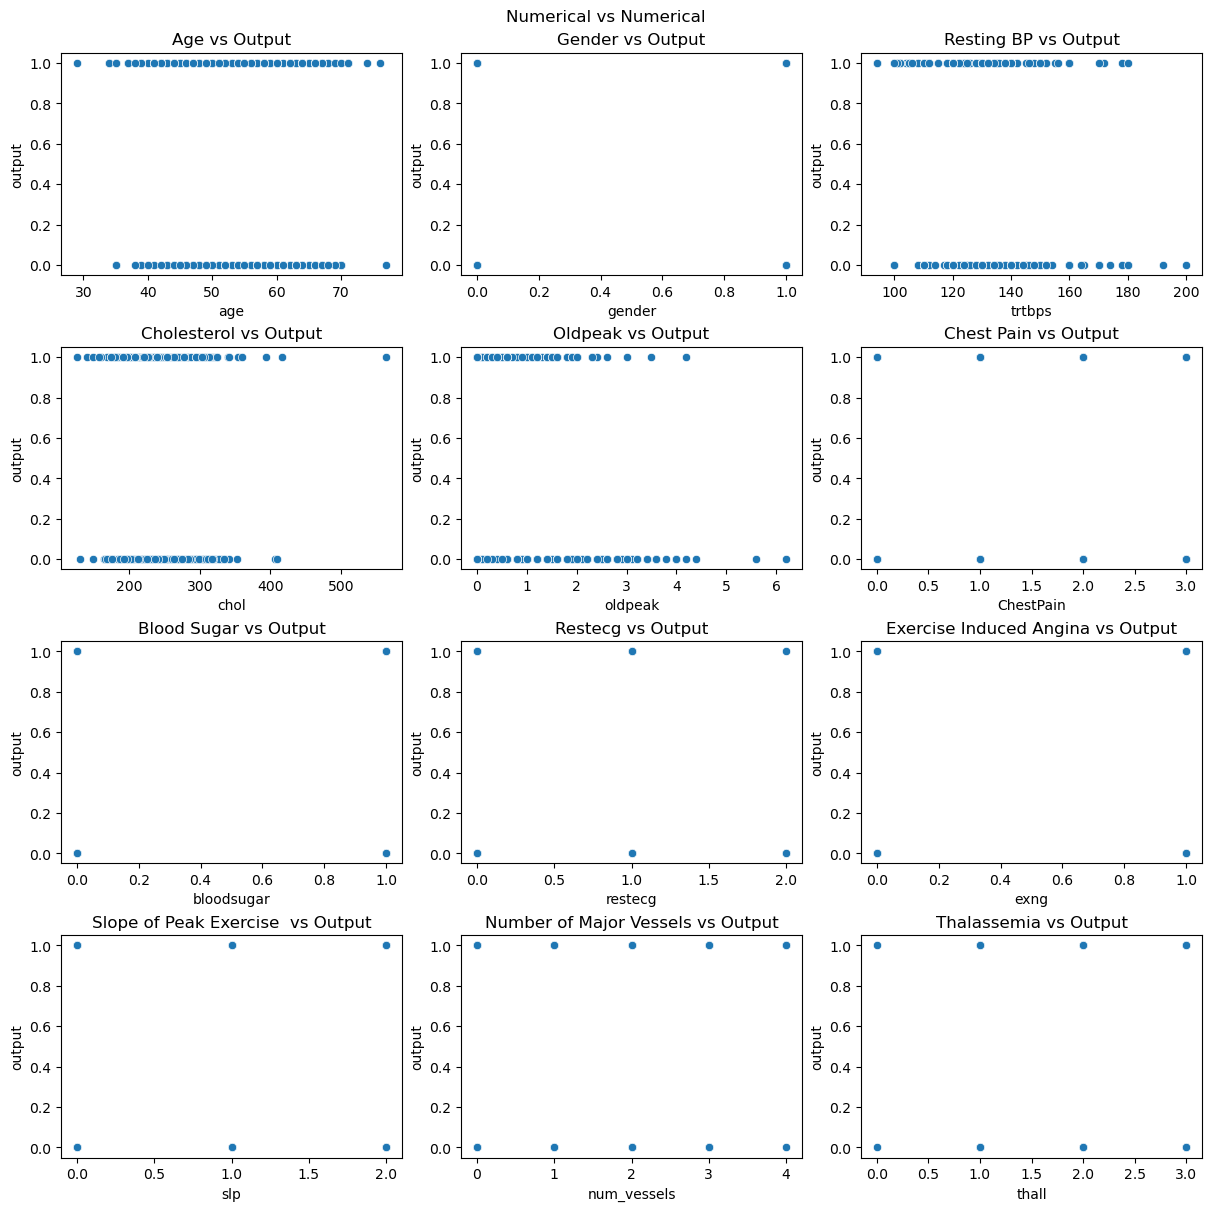

In [16]:
fig, axs = plt.subplots(4, 3, figsize=(12, 12), constrained_layout=True)
fig.suptitle("Numerical vs Numerical")

sns.scatterplot(data=df, x='age', y='output', ax=axs[0][0])
axs[0][0].set_title("Age vs Output")

sns.scatterplot(data=df, x='gender', y='output', ax=axs[0][1])
axs[0][1].set_title("Gender vs Output")

sns.scatterplot(data=df, x='trtbps', y='output', ax=axs[0][2])
axs[0][2].set_title("Resting BP vs Output")

sns.scatterplot(data=df, x='chol', y='output', ax=axs[1][0])
axs[1][0].set_title("Cholesterol vs Output")

sns.scatterplot(data=df, x='oldpeak', y='output', ax=axs[1][1])
axs[1][1].set_title("Oldpeak vs Output")

sns.scatterplot(data=df, x='ChestPain', y='output', ax=axs[1][2])
axs[1][2].set_title("Chest Pain vs Output")

sns.scatterplot(data=df, x='bloodsugar', y='output', ax=axs[2][0])
axs[2][0].set_title("Blood Sugar vs Output")

sns.scatterplot(data=df, x='restecg', y='output', ax=axs[2][1])
axs[2][1].set_title("Restecg vs Output")

sns.scatterplot(data=df, x='exng', y='output', ax=axs[2][2])
axs[2][2].set_title("Exercise Induced Angina vs Output")

sns.scatterplot(data=df, x='slp', y='output', ax=axs[3][0])
axs[3][0].set_title("Slope of Peak Exercise  vs Output")

sns.scatterplot(data=df, x='num_vessels', y='output', ax=axs[3][1])
axs[3][1].set_title("Number of Major Vessels vs Output")

sns.scatterplot(data=df, x='thall', y='output', ax=axs[3][2])
axs[3][2].set_title("Thalassemia vs Output")

plt.show()


<Axes: >

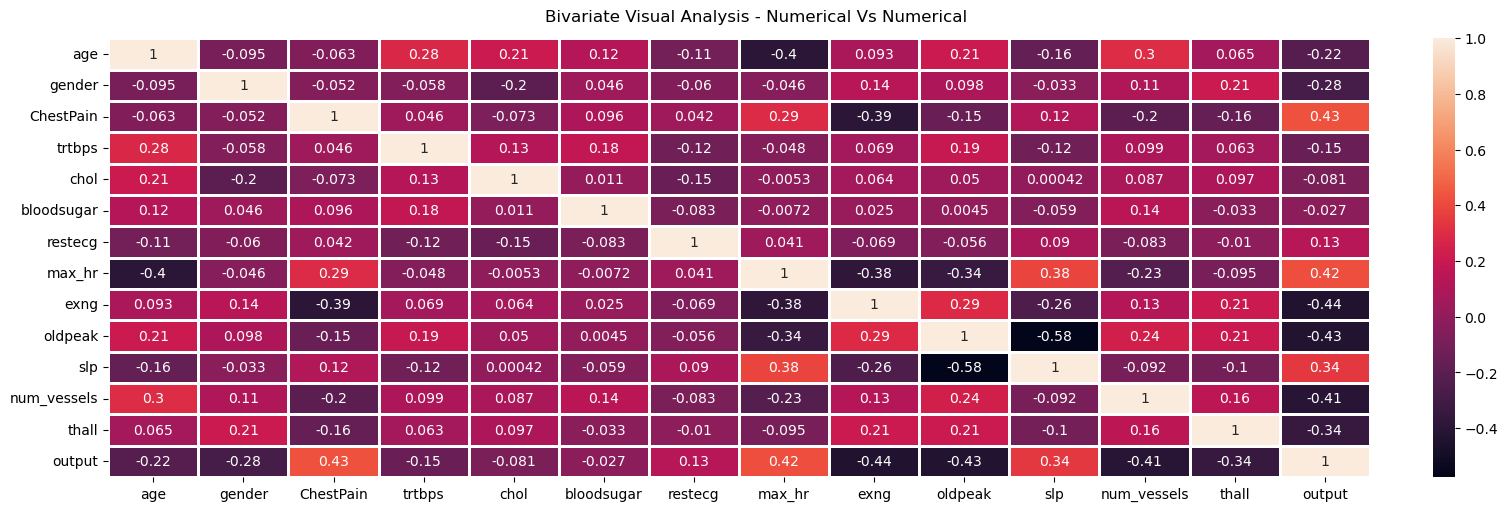

In [17]:
#num vs num
fig = plt.figure(layout="constrained",figsize=(15,5))
fig.suptitle("Bivariate Visual Analysis - Numerical Vs Numerical")
sns.heatmap(df.corr(), annot=True, linewidths=0.8)     

positive values are directly proportional to target#chestpain,max_hr,slp,restecg.
negative values are inversly proportional to target#exng,oldpeak,num_vessels,thall.

<Axes: xlabel='output', ylabel='max_hr'>

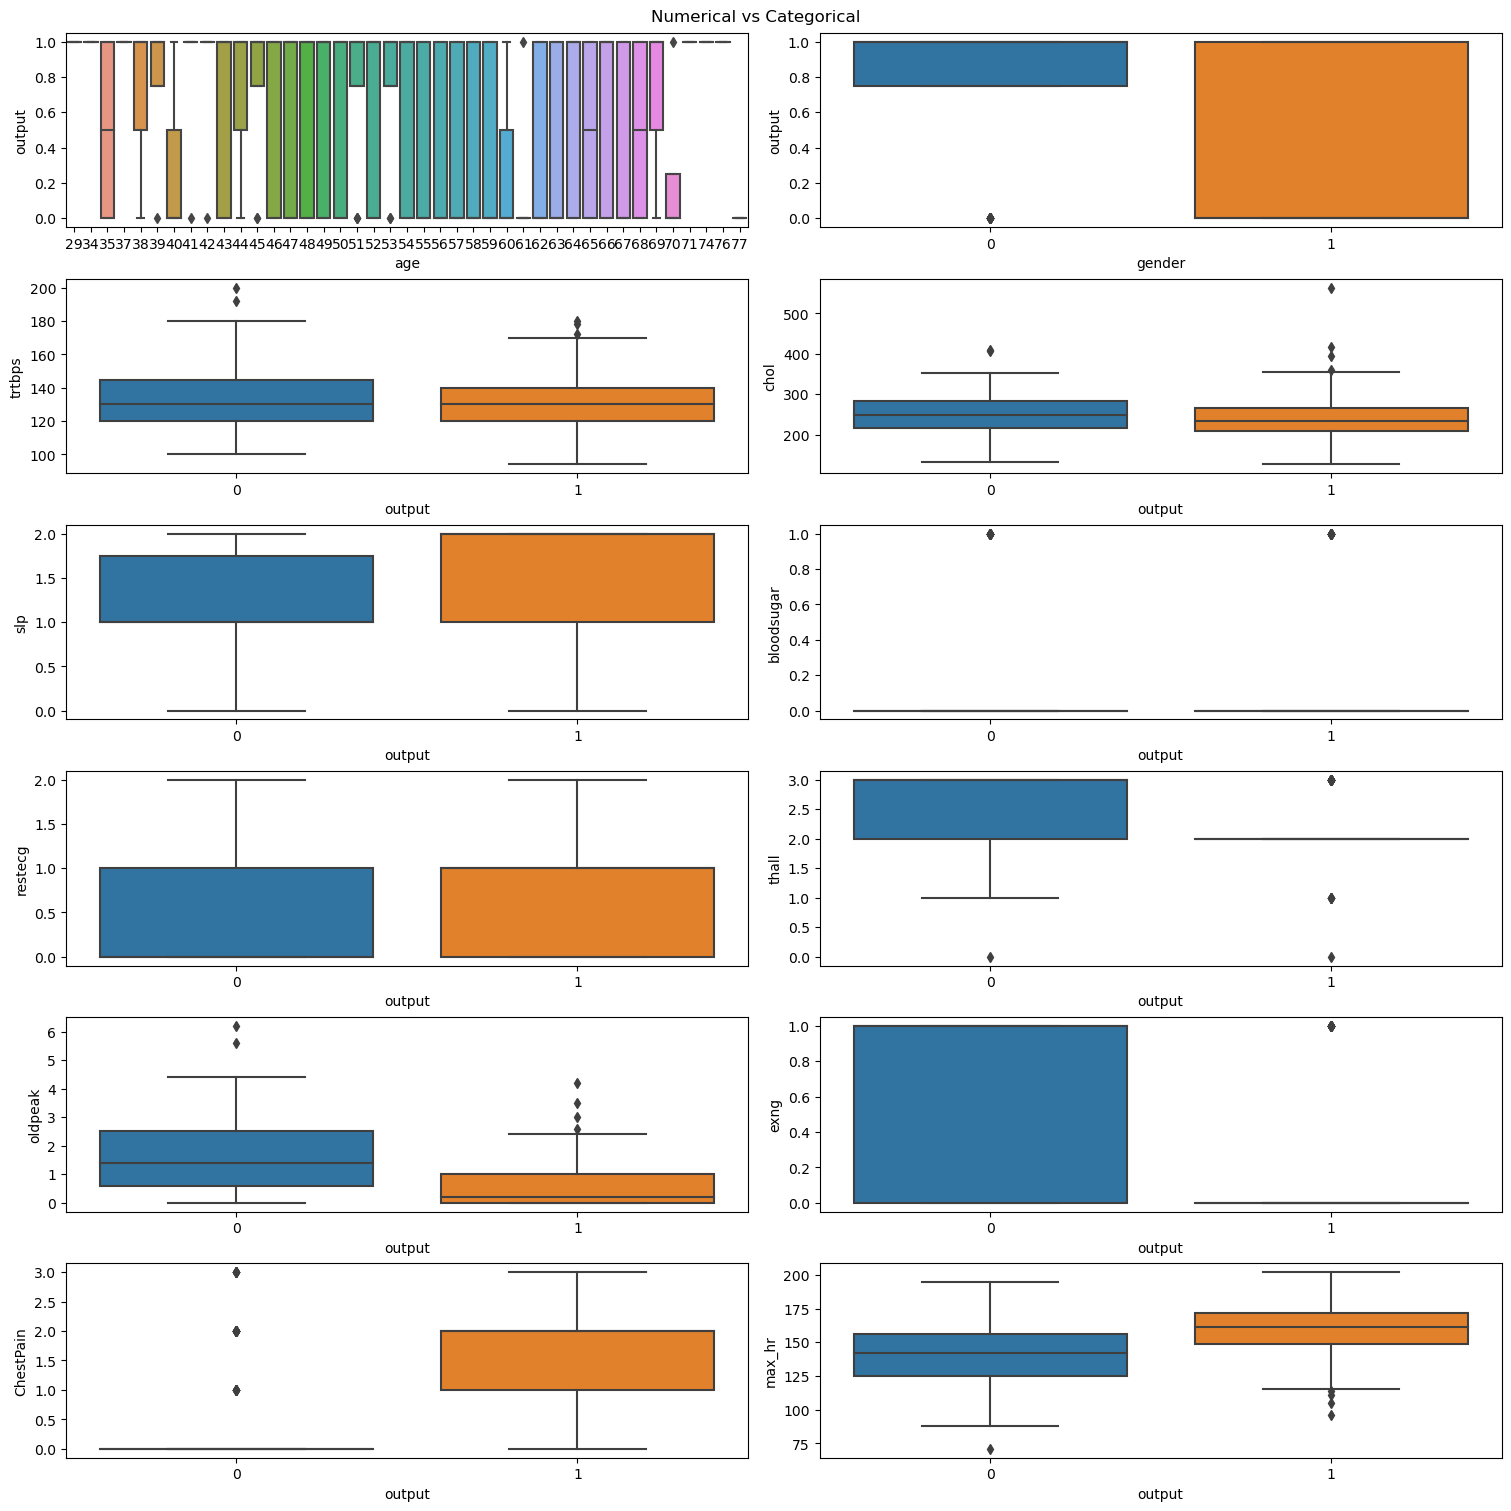

In [8]:
fig, axs = plt.subplots(6,2, figsize=(15,15), constrained_layout=True)
fig.suptitle("Numerical vs Categorical")
sns.boxplot(data=df, x='age', y='output', ax=axs[0][0])
sns.boxplot(data=df, x='gender', y='output', ax=axs[0][1])
sns.boxplot(data=df,y='trtbps', x='output',  ax=axs[1][0])
sns.boxplot(data=df,y='chol', x='output',  ax=axs[1][1])
sns.boxplot(data=df,y='slp', x='output',  ax=axs[2][0])
sns.boxplot(data=df,y='bloodsugar', x='output',  ax=axs[2][1])
sns.boxplot(data=df,y='restecg', x='output',  ax=axs[3][0])
sns.boxplot(data=df,y='thall', x='output',  ax=axs[3][1])
sns.boxplot(data=df,y='oldpeak', x='output',  ax=axs[4][0])
sns.boxplot(data=df,y='exng', x='output',  ax=axs[4][1])
sns.boxplot(data=df,y='ChestPain', x='output',  ax=axs[5][0])
sns.boxplot(data=df,y='max_hr', x='output',  ax=axs[5][1])

C:\Users\bharg\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


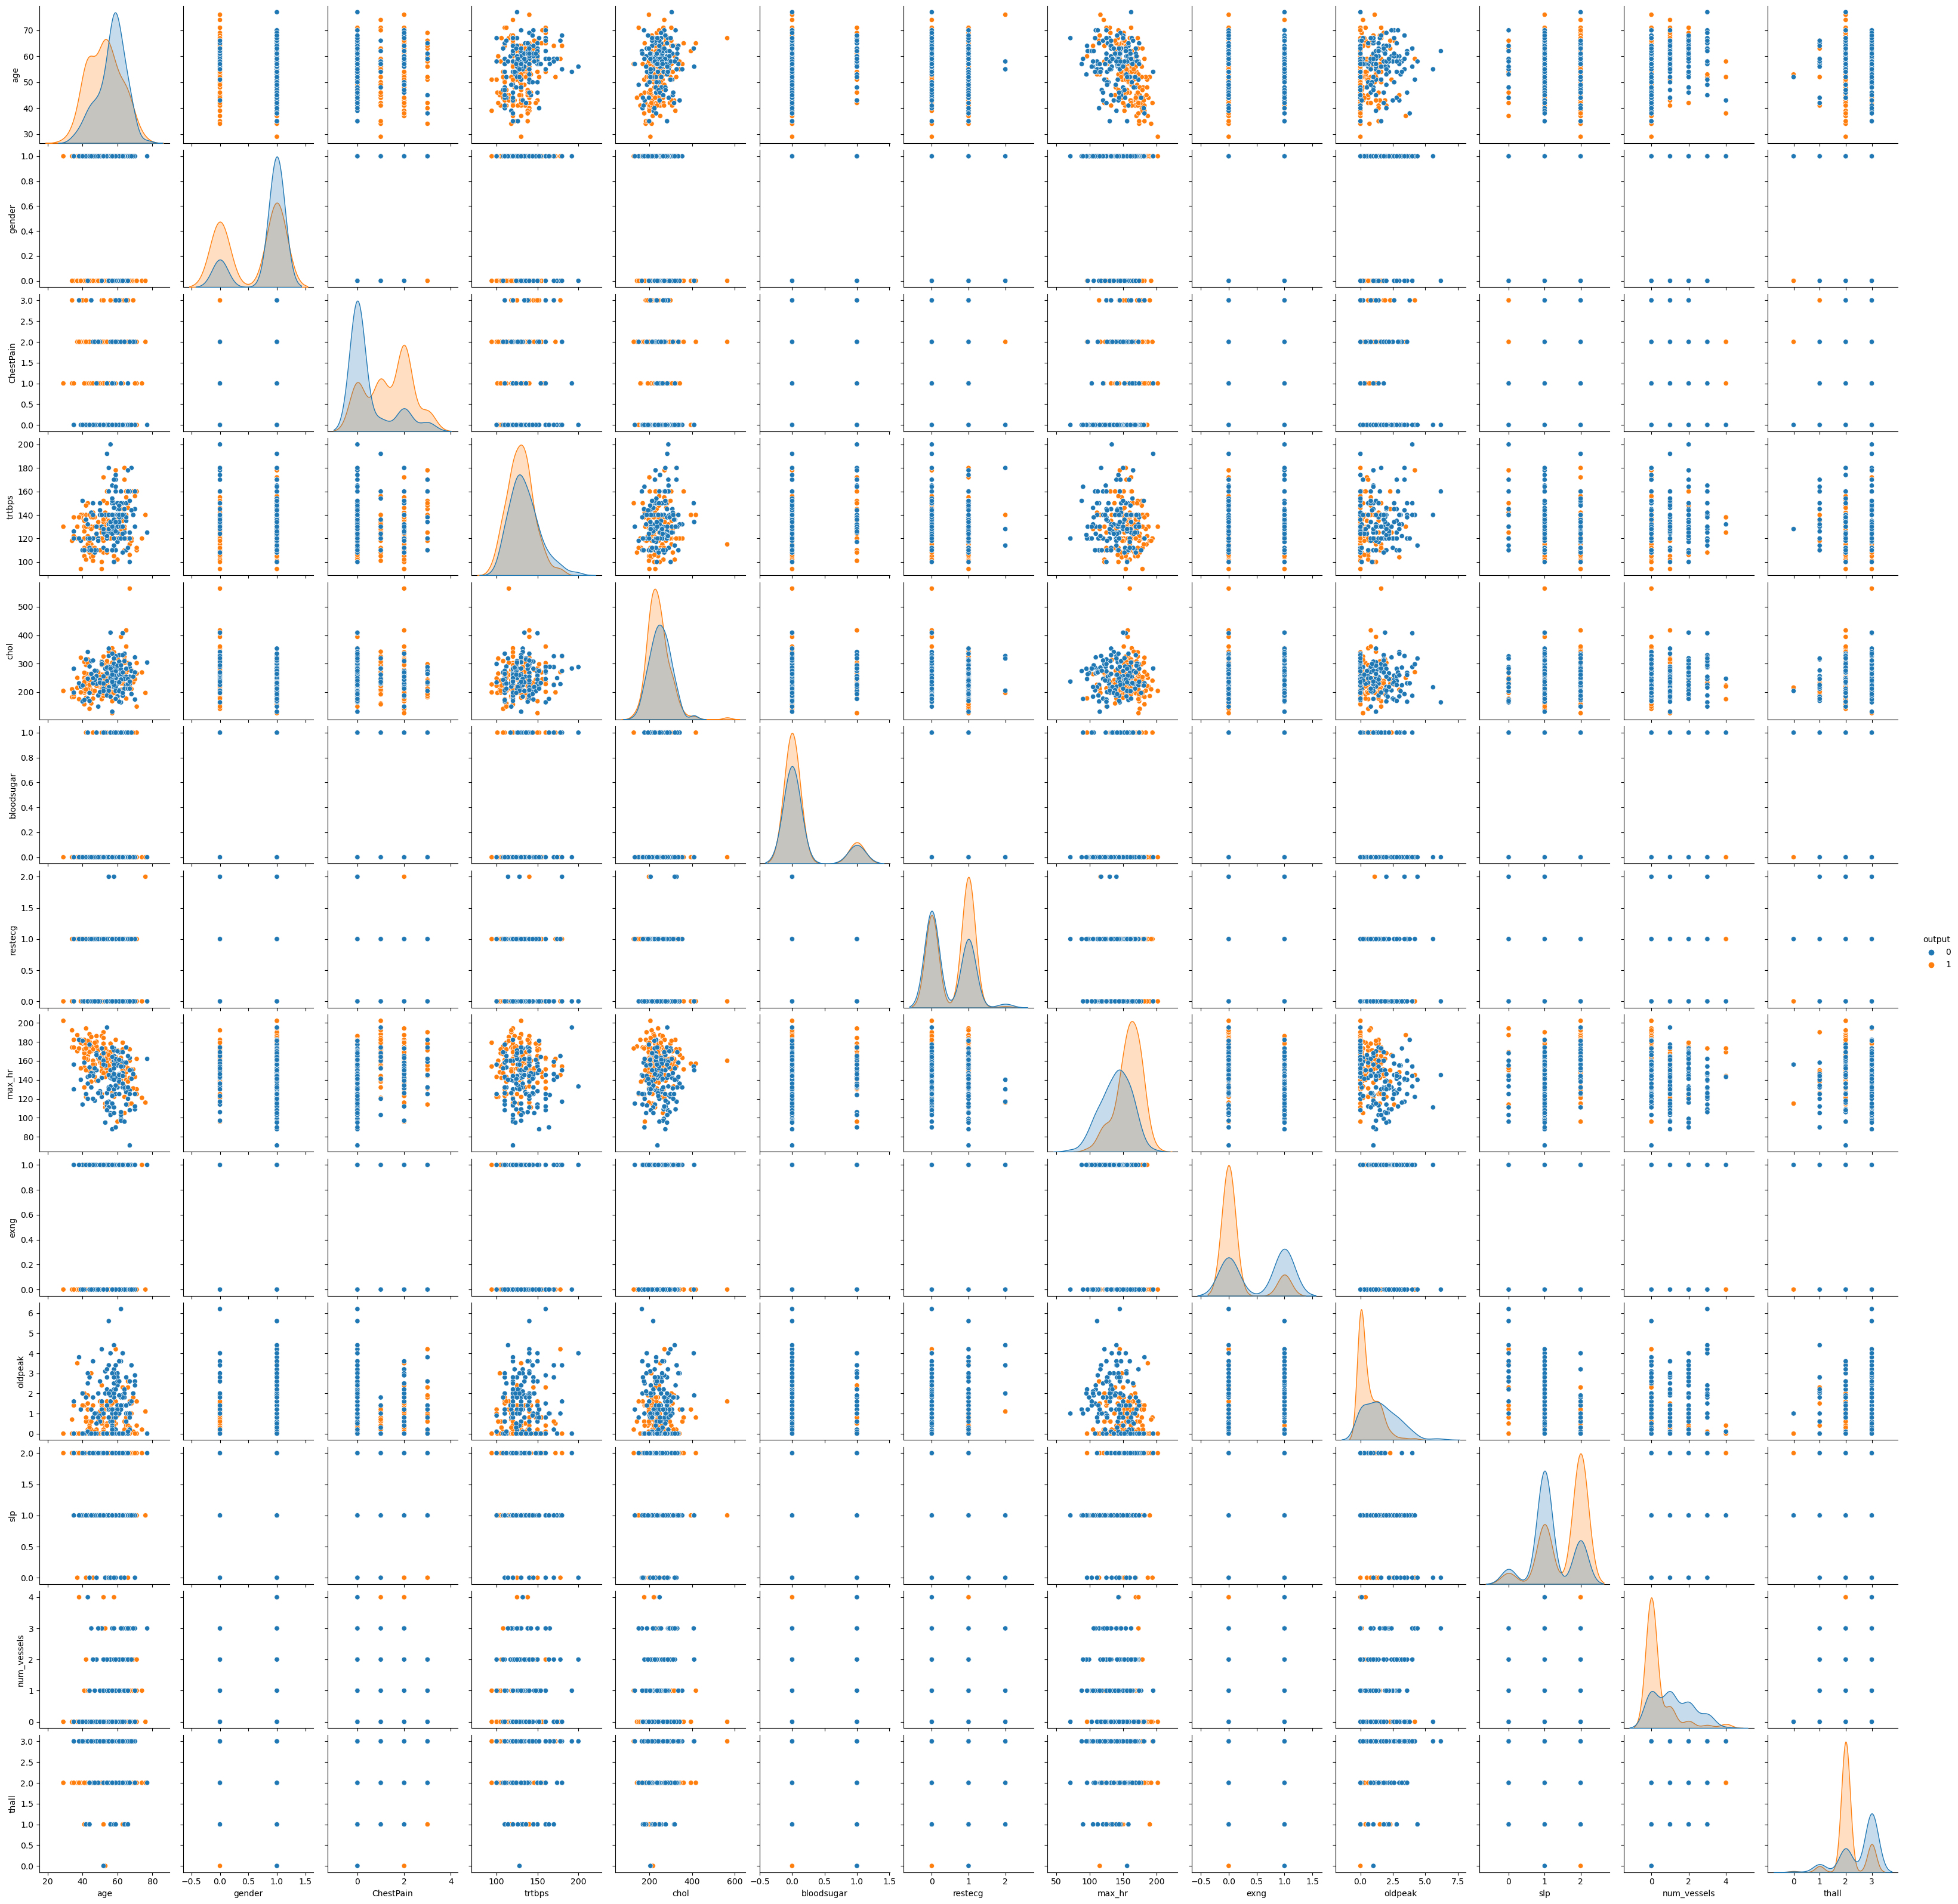

In [4]:
sns.pairplot(df,hue='output')

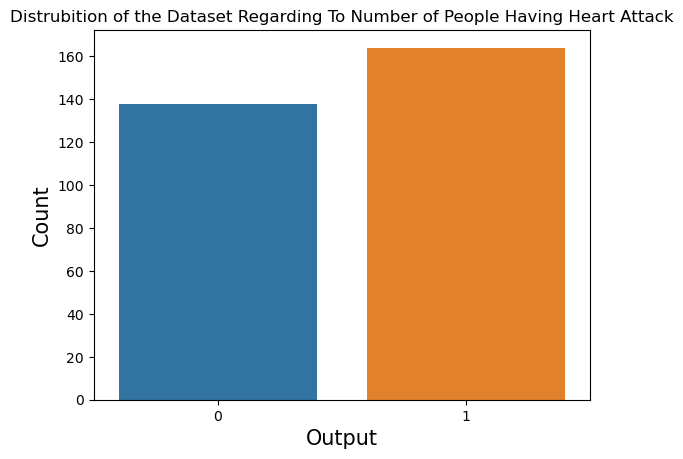

In [28]:
sns.countplot(x='output',data=df)
plt.title("Distrubition of the Dataset Regarding To Number of People Having Heart Attack" , fontsize = 12)
plt.xlabel("Output" , fontsize = 15)
plt.ylabel("Count" , fontsize = 15)
plt.show()

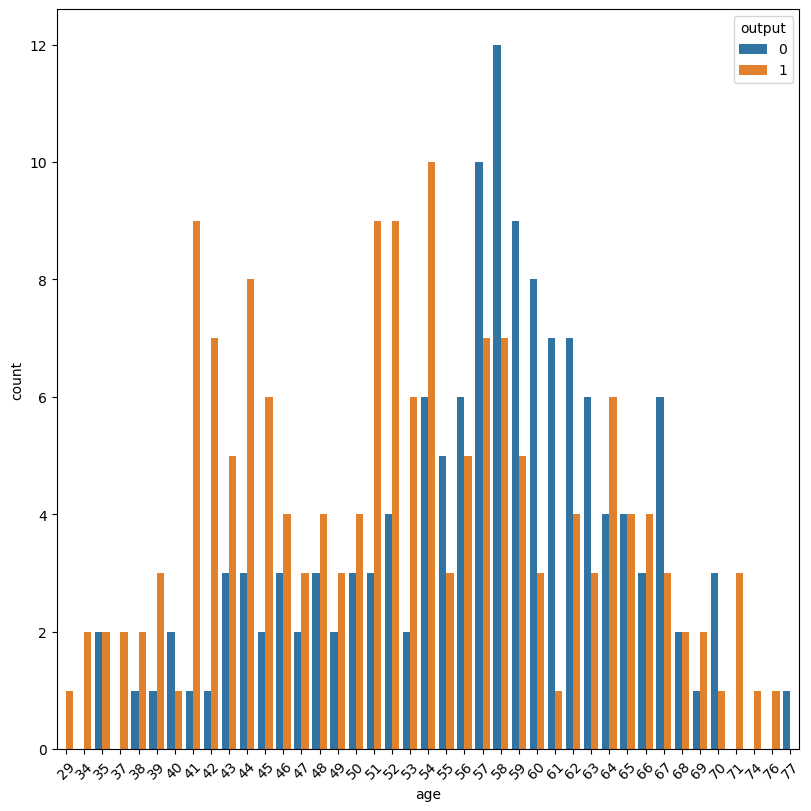

In [12]:
fig, axs = plt.subplots(1,1, figsize=(8,8), constrained_layout=True)
sns.countplot(x='age',hue='output',data=df)
plt.xticks(rotation=45-) 
plt.show()#people age range between 41-54 has high risk of heart disease

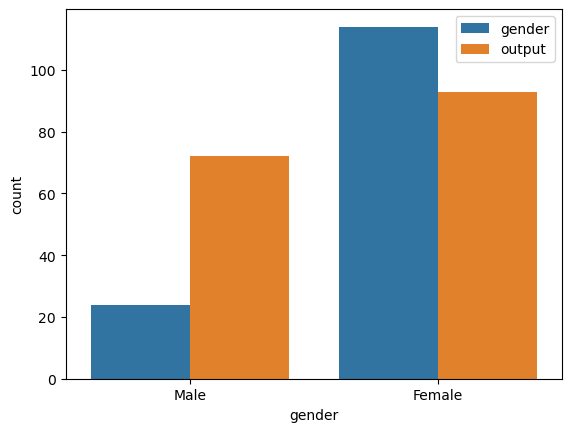

In [4]:
sns.countplot(x='gender',hue='output',data=df)
plt.xticks([0,1],['Male','Female'])
plt.legend(labels=('gender','output'))
plt.show()#females has high chance of heart disease

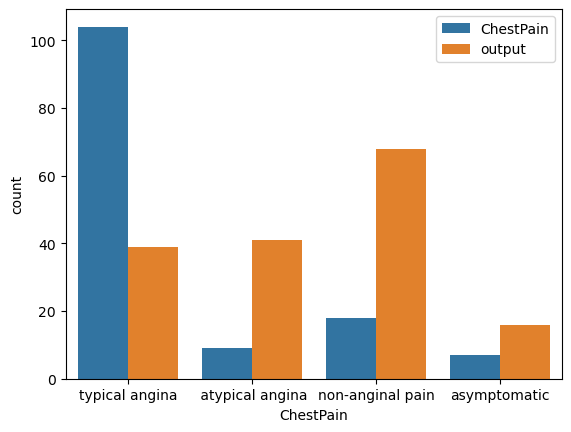

In [38]:
sns.countplot(x='ChestPain',hue='output',data=df)
plt.xticks([0,1,2,3],['typical angina',' atypical angina','non-anginal pain','asymptomatic'])
plt.legend(labels=('ChestPain','output'))
plt.show()#as though typical angina is experienced by more num of ppl non-anginal pain can cause heart failure

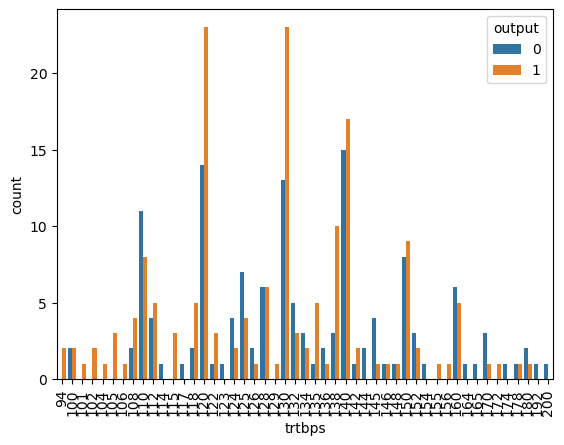

In [24]:
sns.countplot(x='trtbps',hue='output',data=df)
plt.xticks(rotation=90)
plt.show()#120-130 trtbps can cause high heart failure risk

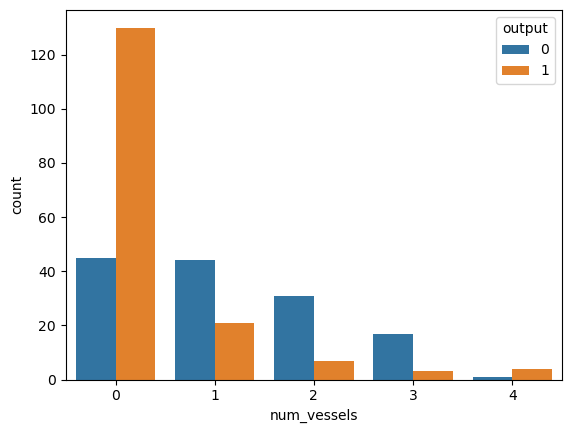

In [29]:
sns.countplot(x='num_vessels',hue='output',data=df)
plt.show()#0 vessels indicates the heart failure

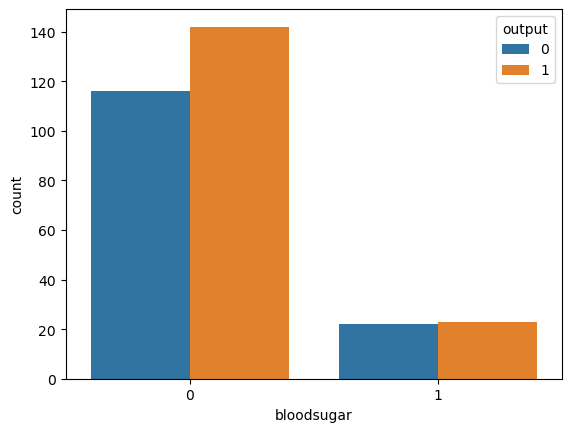

In [32]:
sns.countplot(x='bloodsugar',hue='output',data=df)
plt.show()# ppl with bloodsugar levels lessthan 120mg are more .

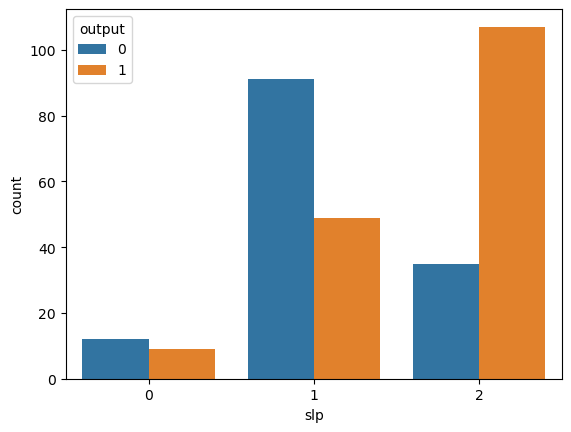

In [30]:
sns.countplot(x='slp',hue='output',data=df)
plt.show()#down sloping has high rate of heart risk .

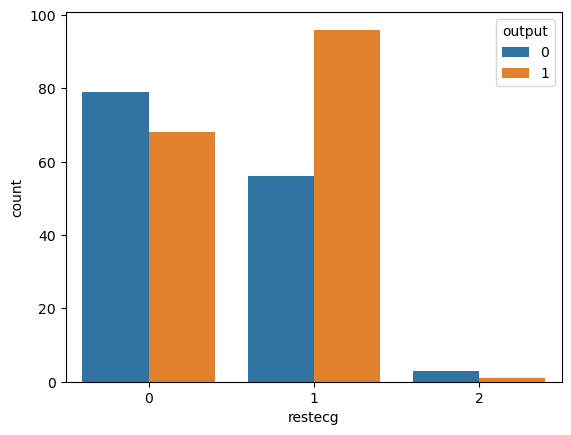

In [33]:
sns.countplot(x='restecg',hue='output',data=df)
plt.show()#abnormal ecg is more prone to heart failure.

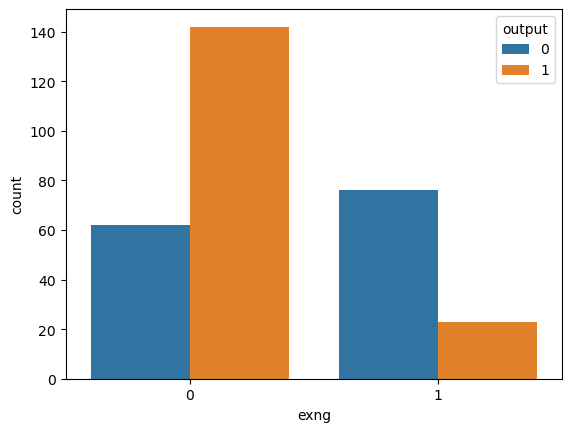

In [34]:
sns.countplot(x='exng',hue='output',data=df)
plt.show()#exng is 0 in most of the cases ,exercise induced angina is not seen to be reason of most of heart failures 

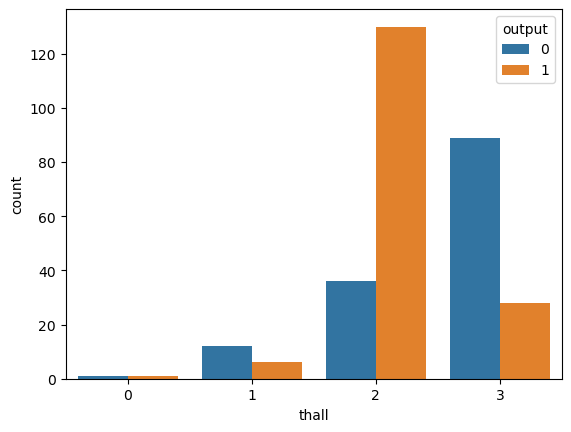

In [35]:
sns.countplot(x='thall',hue='output',data=df)
plt.show()# fixed defect is more

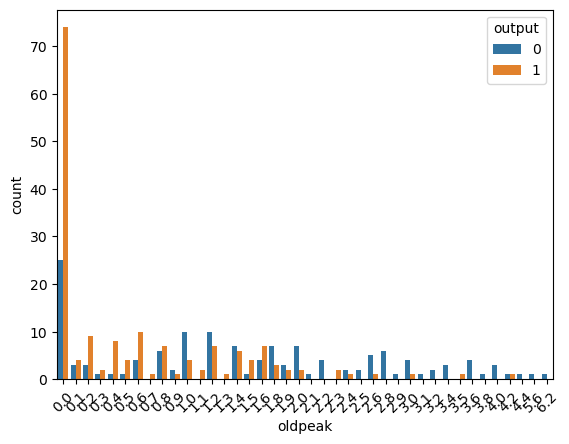

In [37]:
sns.countplot(x='oldpeak',hue='output',data=df)
plt.xticks(rotation=45)
plt.show()

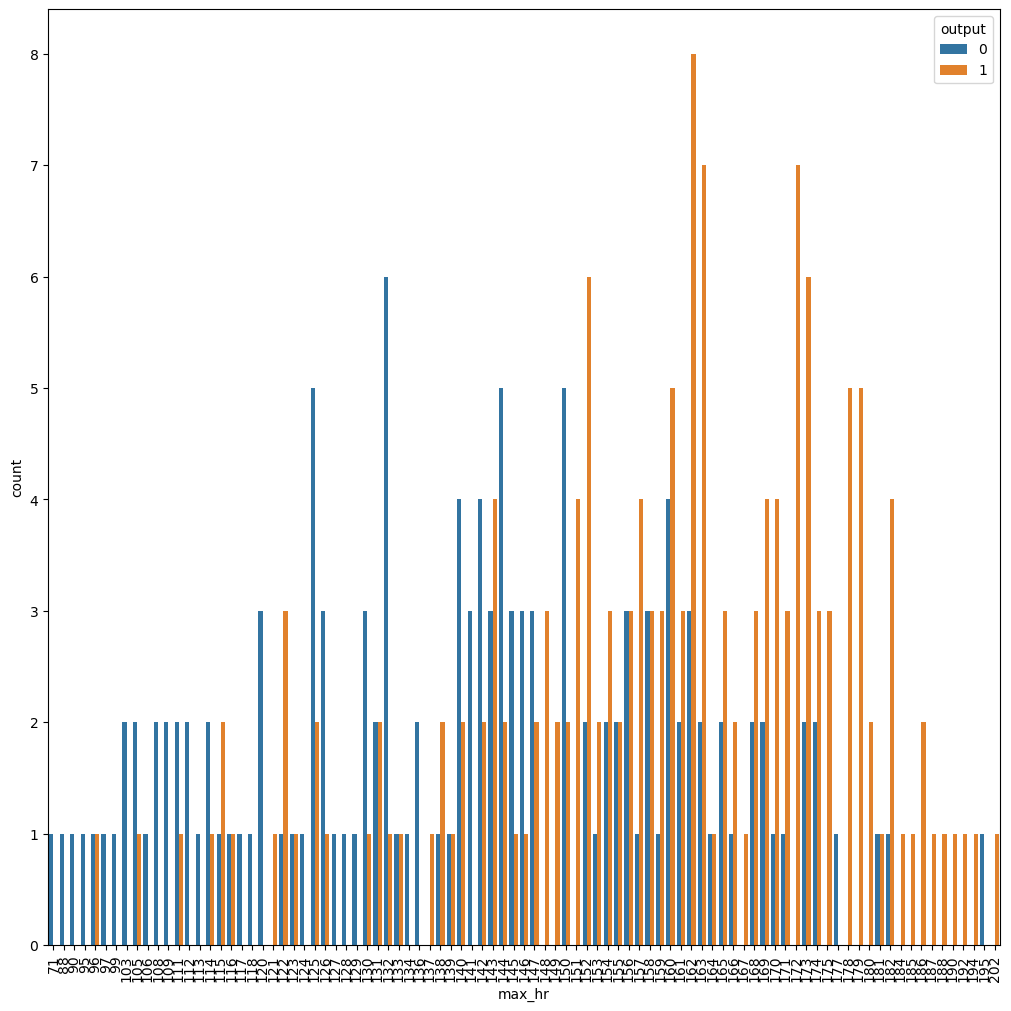

In [4]:
fig, axs = plt.subplots(1,1, figsize=(10,10), constrained_layout=True)
sns.countplot(x='max_hr',hue='output',data=df)
plt.xticks(rotation=90)
plt.show()

In [36]:
filtered_df = df[(df["max_hr"] > 160) & (df["slp"] == 2) & (df["ChestPain"] == 2) & (df["restecg"] == 1)]

# Printing the filtered DataFrame
print(filtered_df)

     age  gender  ChestPain  trtbps  chol  bloodsugar  restecg  max_hr  exng  \
8     52       1          2     172   199           1        1     162     0   
9     57       1          2     150   168           0        1     174     0   
16    58       0          2     120   340           0        1     172     0   
21    44       1          2     130   233           0        1     179     1   
36    54       0          2     135   304           1        1     170     0   
80    41       1          2     112   250           0        1     179     0   
90    48       1          2     124   255           1        1     175     0   
92    52       1          2     138   223           0        1     169     0   
98    43       1          2     130   315           0        1     162     0   
104   50       1          2     129   196           0        1     163     0   
111   57       1          2     150   126           1        1     173     0   
115   37       0          2     120   21